In [17]:
from tensorflow.keras import Sequential,layers

network = Sequential([ # 网络容器
    layers.Conv2D(6,kernel_size=3,strides=1), # 第一个卷积层, 6个3x3卷积核 
    layers.MaxPooling2D(pool_size=2,strides=2), # 高宽各减半的池化层
    layers.ReLU(), # 激活函数
    layers.Conv2D(16,kernel_size=3,strides=1), # 第二个卷积层, 16个3x3卷积核
    layers.MaxPooling2D(pool_size=2,strides=2), # 高宽各减半的池化层 
    layers.ReLU(), # 激活函数
    layers.Flatten(), # 打平层，方便全连接层处理
    layers.Dense(120, activation='relu'), # 全连接层，120个节点
    layers.Dense(84, activation='relu'), # 全连接层，84节点 
    layers.Dense(10) # 全连接层，10个节点
])
network.build(input_shape=(4,28,28,1))
# 统计网络信息
network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            multiple                  60        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 multiple                  0         
_________________________________________________________________
re_lu_6 (ReLU)               multiple                  0         
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  880       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 multiple                  0         
_________________________________________________________________
re_lu_7 (ReLU)               multiple                  0         
_________________________________________________________________
flatten_3 (Flatten)          multiple                 

In [7]:
import tensorflow as tf
x =tf.random.uniform([2,2,3], maxval=10, dtype=tf.int32)
x

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[9, 7, 4],
        [7, 1, 7]],

       [[4, 8, 5],
        [5, 9, 2]]], dtype=int32)>

tf.Tensor(b'./tensorflow2/data/test/22.jpg', shape=(), dtype=string)
(32, 32, 3)


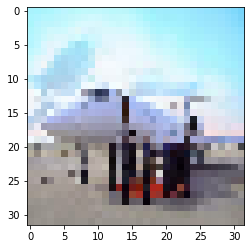

预测飞机🛬🛬🛬🛬🛬🛬🛬 [[0.5225508]]
----------------------------------------
tf.Tensor(b'./tensorflow2/data/test/\xe4\xb8\x8b\xe8\xbd\xbd.jpg', shape=(), dtype=string)
(32, 32, 3)


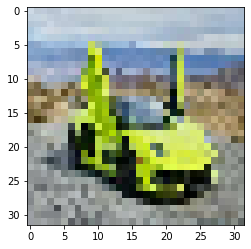

预测飞机🛬🛬🛬🛬🛬🛬🛬 [[0.93533677]]
----------------------------------------
tf.Tensor(b'./tensorflow2/data/test/\xe6\x9c\xaa\xe5\x91\xbd\xe5\x90\x8d.jpg', shape=(), dtype=string)
(32, 32, 3)


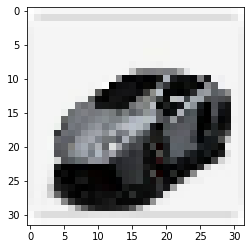

预测🚘🚘🚘🚘🚘🚘🚘 [[0.999998]]
----------------------------------------
tf.Tensor(b'./tensorflow2/data/test/images33.jpg', shape=(), dtype=string)
(32, 32, 3)


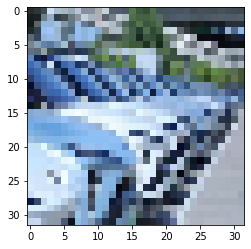

预测🚘🚘🚘🚘🚘🚘🚘 [[0.9999896]]
----------------------------------------
tf.Tensor(b'./tensorflow2/data/test/\xe4\xb8\x8b\xe8\xbd\xbd11.jpg', shape=(), dtype=string)
(32, 32, 3)


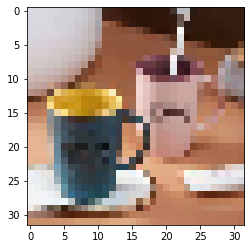

预测🚘🚘🚘🚘🚘🚘🚘 [[0.9659444]]
----------------------------------------
tf.Tensor(b'./tensorflow2/data/test/images.jpg', shape=(), dtype=string)
(32, 32, 3)


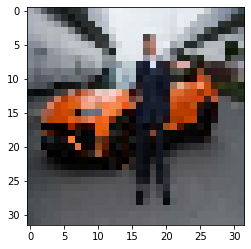

预测🚘🚘🚘🚘🚘🚘🚘 [[0.99941623]]
----------------------------------------
tf.Tensor(b'./tensorflow2/data/test/images5.jpg', shape=(), dtype=string)
(32, 32, 3)


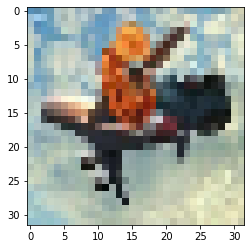

预测飞机🛬🛬🛬🛬🛬🛬🛬 [[0.9856794]]
----------------------------------------
tf.Tensor(b'./tensorflow2/data/test/ee.jpg', shape=(), dtype=string)
(32, 32, 3)


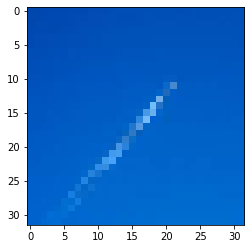

预测飞机🛬🛬🛬🛬🛬🛬🛬 [[0.99692065]]
----------------------------------------
tf.Tensor(b'./tensorflow2/data/test/images1.jpg', shape=(), dtype=string)
(32, 32, 3)


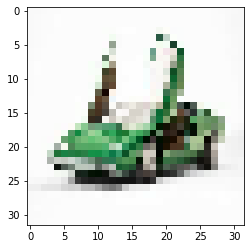

预测🚘🚘🚘🚘🚘🚘🚘 [[0.9739546]]
----------------------------------------
tf.Tensor(b'./tensorflow2/data/test/aa.jpg', shape=(), dtype=string)
(32, 32, 3)


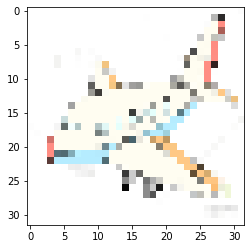

预测飞机🛬🛬🛬🛬🛬🛬🛬 [[0.9994867]]
----------------------------------------
tf.Tensor(b'./tensorflow2/data/test/images2.jpg', shape=(), dtype=string)
(32, 32, 3)


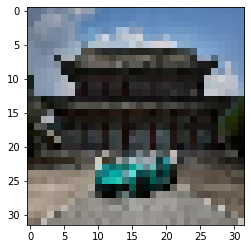

预测飞机🛬🛬🛬🛬🛬🛬🛬 [[0.87516165]]
----------------------------------------


In [11]:
# # 🛬:0,🚘：1
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('./tensorflow2/data/tf_model_savedmodel')

# a = tf.data.Dataset.list_files("./data/cifar2/test/*/*.jpg")  # 默认随机读取
a = tf.data.Dataset.list_files("./tensorflow2/data/test/*.jpg")  # 默认随机读取

j= 0
for i in a:
    if j==30:break
    j += 1
    print(i)
    img = tf.io.read_file(i)
    img= tf.image.decode_jpeg(img)
    
    new_shape1 = 32
    img1 = tf.image.resize(img,[new_shape1, new_shape1])/255.0
    print(img1.shape)
    plt.imshow(img1)
    plt.show()
    predict_prob = model.predict(tf.expand_dims(img1, 0))  # 扩充维度（batch 方向）
    if predict_prob[0][0]>0.5:print('预测🚘🚘🚘🚘🚘🚘🚘', predict_prob)
    else: print(f'预测飞机🛬🛬🛬🛬🛬🛬🛬', 1-predict_prob)
    print('-'*40)

    
# def load_image(img_path,size = (32,32)):
#     label = tf.constant(1,tf.int8) if tf.strings.regex_full_match(img_path,".*automobile.*") \
#             else tf.constant(0,tf.int8)
#     img = tf.io.read_file(img_path)
#     img = tf.image.decode_jpeg(img) #注意此处为jpeg格式
#     img = tf.image.resize(img,size)/255.0
#     return(img,label)